<center><h1>Analisis de Riesgo de Burnout</h1></center>

# Descripción del Dataset y Justificación

Este dataset contiene información de 500 personas sobre sus hábitos digitales y salud mental, incluyendo horas de pantalla, sueño, uso de redes sociales, nivel de estrés y si tienen riesgo de burnout (agotamiento mental y emocional por exceso de estrés).

Lo usamos porque permite aplicar modelos de Machine Learning para predecir cómo ciertos hábitos, como el uso excesivo de pantallas, pueden influir en el riesgo de burnout. Es un problema real y actual, especialmente entre jóvenes y trabajadores digitales.

Además, este dataset es útil para entrenar modelos de regresión y nos ayuda a entender qué factores afectan más al bienestar mental.

# Análisis y Preparación del Dataset de Hábitos de Salud Mental
Este cuaderno contiene los pasos de exploración, limpieza, normalización y visualización de datos preparados para el entrenamiento de un modelo de Machine Learning.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Carga de Datos
Se carga el archivo CSV 'habitos_salud_mental.csv' y se muestran las primeras filas.

In [ ]:
df = pd.read_csv('habitos_salud_mental.csv')
df.head()

,id,edad,sexo,horas_pantalla,usa_redes_sociales,duerme_horas,actividad_fisica,nivel_estres,medita,horas_redes,nivel_ansiedad,riesgo_burnout
0,1,56,Masculino,5.3,True,5.4,Baja,1,False,0.9,1,0
1,2,46,Femenino,8.3,True,5.3,Baja,1,True,2.9,2,0
2,3,32,Masculino,3.8,True,6.8,Alta,6,True,3.8,3,0
3,4,60,Otro,7.2,True,8.2,Media,5,True,1.9,3,0
4,5,25,Femenino,7.2,True,5.0,Media,9,False,3.3,10,1


## 2. Exploración de Datos
Se revisa la estructura y estadísticas básicas.

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  500 non-null    int64  
 1   edad                500 non-null    int64  
 2   sexo                500 non-null    object 
 3   horas_pantalla      500 non-null    float64
 4   usa_redes_sociales  500 non-null    bool   
 5   duerme_horas        500 non-null    float64
 6   actividad_fisica    500 non-null    object 
 7   nivel_estres        500 non-null    int64  
 8   medita              500 non-null    bool   
 9   horas_redes         500 non-null    float64
 10  nivel_ansiedad      500 non-null    int64  
 11  riesgo_burnout      500 non-null    int64  
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 40.2+ KB


,id,edad,horas_pantalla,duerme_horas,nivel_estres,horas_redes,nivel_ansiedad,riesgo_burnout
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.506000,6.214800,6.545600,5.558000,1.979000,4.996000,0.084000
std,144.481833,12.368505,1.970163,1.424872,2.853581,1.215984,2.858027,0.277666
min,1.000000,18.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000
25%,125.750000,29.000000,4.900000,5.600000,3.000000,1.000000,3.000000,0.000000
50%,250.500000,41.000000,6.300000,6.500000,6.000000,2.000000,5.000000,0.000000
75%,375.250000,50.000000,7.500000,7.500000,8.000000,3.025000,7.000000,0.000000
max,500.000000,60.000000,11.300000,10.000000,10.000000,4.000000,10.000000,1.000000


## 3. Limpieza
- Manejo de valores faltantes

In [8]:
df = df.dropna()
df.head()

,id,edad,sexo,horas_pantalla,usa_redes_sociales,duerme_horas,actividad_fisica,nivel_estres,medita,horas_redes,nivel_ansiedad,riesgo_burnout
0,1,56,Masculino,5.3,True,5.4,Baja,1,False,0.9,1,0
1,2,46,Femenino,8.3,True,5.3,Baja,1,True,2.9,2,0
2,3,32,Masculino,3.8,True,6.8,Alta,6,True,3.8,3,0
3,4,60,Otro,7.2,True,8.2,Media,5,True,1.9,3,0
4,5,25,Femenino,7.2,True,5.0,Media,9,False,3.3,10,1


In [9]:
df.shape

(500, 12)

## 4. Estadísticas Adicionales
Obtención de correlaciones y conteos.

In [10]:
df.corr(numeric_only=True)

,id,edad,horas_pantalla,usa_redes_sociales,duerme_horas,nivel_estres,medita,horas_redes,nivel_ansiedad,riesgo_burnout
id,1.000000,0.040052,0.026843,0.025113,-0.030891,0.039121,0.093008,-0.032154,0.032807,-0.029722
edad,0.040052,1.000000,0.027020,-0.027968,-0.033413,-0.027264,0.019936,-0.022757,-0.027268,-0.047413
horas_pantalla,0.026843,0.027020,1.000000,0.011971,-0.015568,-0.069662,0.000309,-0.029382,0.218214,0.269541
usa_redes_sociales,0.025113,-0.027968,0.011971,1.000000,-0.055716,0.023511,-0.030560,0.629745,0.032785,0.052741
duerme_horas,-0.030891,-0.033413,-0.015568,-0.055716,1.000000,-0.001194,-0.072409,-0.051287,-0.225880,-0.283225
nivel_estres,0.039121,-0.027264,-0.069662,0.023511,-0.001194,1.000000,0.033329,0.068935,0.899123,0.363105
medita,0.093008,0.019936,0.000309,-0.030560,-0.072409,0.033329,1.000000,-0.031514,0.041149,0.062099
horas_redes,-0.032154,-0.022757,-0.029382,0.629745,-0.051287,0.068935,-0.031514,1.000000,0.057928,0.108511
nivel_ansiedad,0.032807,-0.027268,0.218214,0.032785,-0.225880,0.899123,0.041149,0.057928,1.000000,0.492855
riesgo_burnout,-0.029722,-0.047413,0.269541,0.052741,-0.283225,0.363105,0.062099,0.108511,0.492855,1.000000


## 5. Visualizaciones con Matplotlib
Histogramas y diagramas de caja para variables seleccionadas.

### Histogramas de las variables numéricas

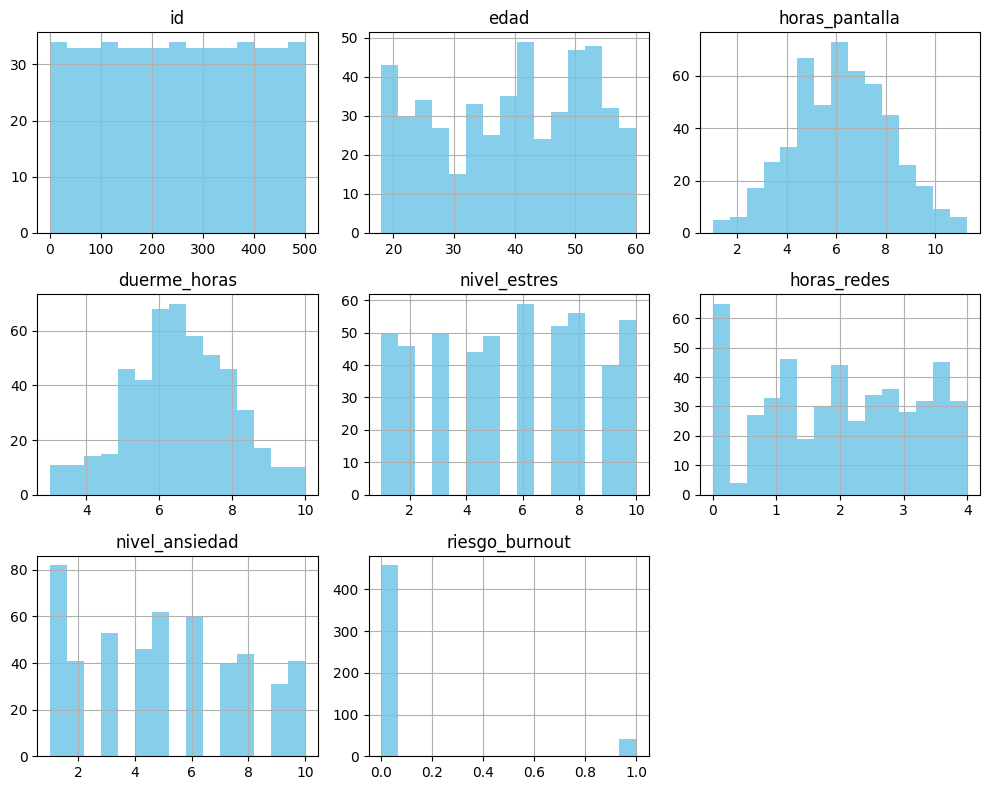

In [ ]:
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(10, 8), bins=15, color='skyblue')
plt.tight_layout()
plt.show()

### Diagramas de caja para ver valores atípicos

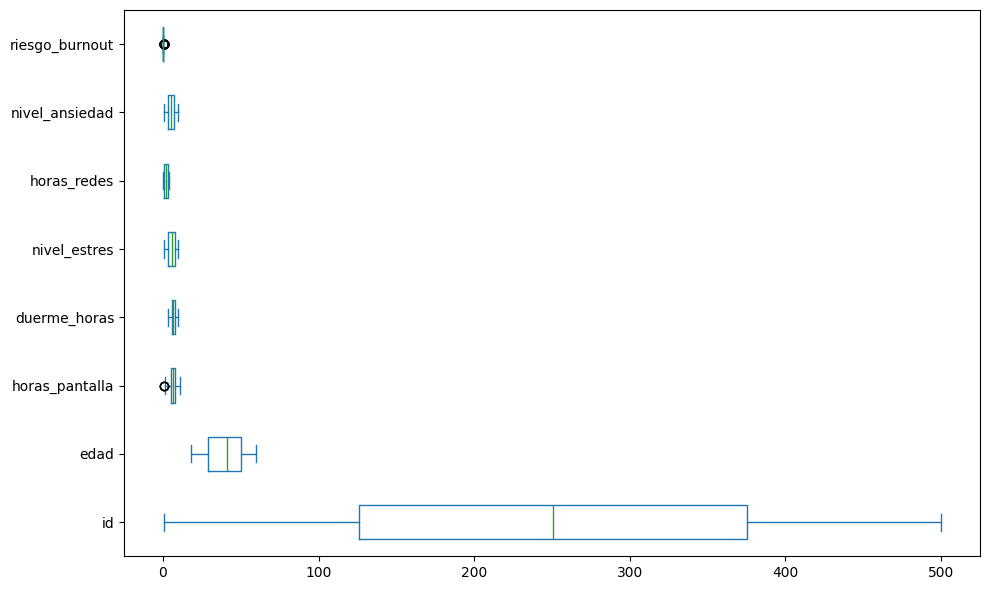

In [ ]:
df.select_dtypes(include=['float64', 'int64']).plot(kind='box', figsize=(10, 6), vert=False)
plt.tight_layout()
plt.show()

## 6. Guardado del Dataset Limpio
Se exporta el dataset ya procesado para uso en entrenamiento.

In [13]:
df.to_csv('habitos_salud_mental_limpio.csv', index=False)
print('Dataset limpio guardado como habitos_salud_mental_limpio.csv')

Dataset limpio guardado como habitos_salud_mental_limpio.csv
